In [2]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
tokenizer = info.features['text'].encoder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXTJIAV/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXTJIAV/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXTJIAV/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
buffer_size = 10000
batch_size = 128

train_data, test_data = dataset['train'], dataset['test']
train_dataset = train_data.shuffle(buffer_size)
train_dataset = train_dataset.padded_batch(batch_size)
test_dataset = test_data.padded_batch(batch_size)

In [4]:
import tensorflow as tf
import numpy as np

#hyperparameter
batch_size=1
timesteps=20
features=20
filters=128
kernel_size=5

random_input = np.random.rand(batch_size, timesteps, features)
print(f'shape {random_input.shape}')

conv1d = tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')
result =conv1d(random_input)
print(f'result shape {result.shape}')

maxpooling = tf.keras.layers.GlobalMaxPool1D()
result = maxpooling(random_input)
print(f'max pooling result {result.shape}')

shape (1, 20, 20)
result shape (1, 16, 128)
max pooling result (1, 20)


In [8]:
embedding_dim = 16
filters = 128
kernel_size=5
dense_dim =16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 16)          130960    
                                                                 
 conv1d_6 (Conv1D)           (None, None, 128)         10368     
                                                                 
 global_max_pooling1d_6 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 16)                2064      
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                      

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
NUM_EPOCHS = 10

# Train the model
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
196/196 [==============================] - 86s 416ms/step - loss: 0.6871 - accuracy: 0.5336 - val_loss: 0.6262 - val_accuracy: 0.6610
Epoch 2/10
196/196 [==============================] - 38s 193ms/step - loss: 0.5446 - accuracy: 0.7329 - val_loss: 0.4423 - val_accuracy: 0.8019
Epoch 3/10
196/196 [==============================] - 26s 133ms/step - loss: 0.4272 - accuracy: 0.8124 - val_loss: 0.3659 - val_accuracy: 0.8426
Epoch 4/10
196/196 [==============================] - 21s 107ms/step - loss: 0.3378 - accuracy: 0.8595 - val_loss: 0.3293 - val_accuracy: 0.8596
Epoch 5/10
196/196 [==============================] - 19s 95ms/step - loss: 0.2792 - accuracy: 0.8912 - val_loss: 0.3235 - val_accuracy: 0.8629
Epoch 6/10
196/196 [==============================] - 15s 75ms/step - loss: 0.2327 - accuracy: 0.9134 - val_loss: 0.3322 - val_accuracy: 0.8621
Epoch 7/10
196/196 [==============================] - 15s 74ms/step - loss: 0.1964 - accuracy: 0.9293 - val_loss: 0.3543 - val_accur

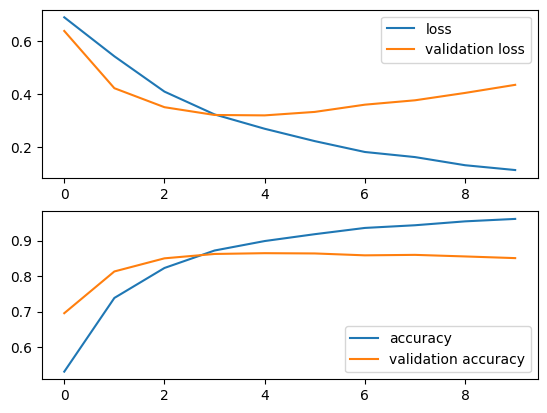

In [29]:
import matplotlib.pyplot as plt


plt, axs = plt.subplots(2)
axs[0].plot(history.history['loss'], label='loss')
axs[0].plot(history.history['val_loss'], label= 'validation loss')
axs[0].legend()
axs[1].plot(history.history['accuracy'], label='accuracy')
axs[1].plot(history.history['val_accuracy'], label='validation accuracy')
axs[1].legend()